<a href="https://colab.research.google.com/github/JoseSaidNeneMiranda/Librero/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Cargar el dataset
data = pd.read_csv('fer2013.csv')

# Convertir las cadenas de píxeles a matrices de números
pixels = data['pixels'].tolist()
faces = []
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split()]
    face = np.asarray(face).reshape(48, 48)
    faces.append(face.astype('float32'))

faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces = faces / 255.0

# Convertir las etiquetas a categorías
emotions = pd.get_dummies(data['emotion']).values

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.2, random_state=42)

# Definir el modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc:.2f}")

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title("Precisión durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()


ValueError: cannot reshape array of size 95 into shape (48,48)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - accuracy: 0.2207 - loss: 1.8847 - val_accuracy: 0.1477 - val_loss: 1.8667
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.2172 - loss: 1.8536 - val_accuracy: 0.2431 - val_loss: 1.8179
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.2252 - loss: 1.8269 - val_accuracy: 0.2492 - val_loss: 1.7760
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.2726 - loss: 1.7626 - val_accuracy: 0.2369 - val_loss: 1.7672
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.2810 - loss: 1.7638 - val_accuracy: 0.2554 - val_loss: 1.7373
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3194 - loss: 1.6796 - val_accuracy: 0.2862 - val_loss: 1.7254
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.3454 - loss: 1.6500 - val_accuracy: 0.3231 - val_loss: 1.6997
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.3826 - loss: 1.6083 - val_accuracy: 0.

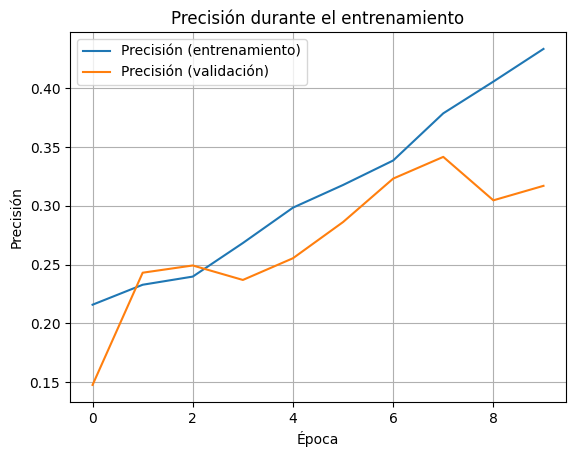

In [ ]:
# --- INSTALAR DEPENDENCIAS (si no están instaladas) ---
!pip install pandas matplotlib scikit-learn tensorflow --quiet

# --- IMPORTAR LIBRERÍAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# --- CARGAR EL CSV (asegúrate de haber subido el archivo fer2013.csv) ---
data = pd.read_csv('fer2013.csv')

# --- PROCESAR LOS DATOS Y ELIMINAR FILAS DEFECTUOSAS ---
faces = []
labels = []

for i, row in data.iterrows():
    pixel_sequence = row['pixels']
    pixel_values = [int(pixel) for pixel in pixel_sequence.split()]

    if len(pixel_values) == 48*48:  # Validamos tamaño correcto
        face = np.asarray(pixel_values).reshape(48, 48)
        faces.append(face.astype('float32'))
        labels.append(row['emotion'])

faces = np.array(faces)
faces = np.expand_dims(faces, -1)  # Convertimos a (n, 48, 48, 1)
faces = faces / 255.0  # Normalizamos los valores de los pixeles

# --- CONVERTIR EMOCIONES A ONE-HOT ---
labels = pd.get_dummies(labels).values

# --- DIVIDIR EN ENTRENAMIENTO Y PRUEBA ---
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2, random_state=42)

# --- DEFINIR LA RED NEURONAL CONVOLUCIONAL (CNN) ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 clases de emociones
])

# --- COMPILAR EL MODELO ---
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- ENTRENAR EL MODELO ---
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# --- EVALUAR EL MODELO ---
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Precisión en el conjunto de prueba: {test_acc:.2f}")

# --- GRAFICAR RESULTADOS ---
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title("Precisión durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()
